C:\Users\paula\AppData\Local\Temp\ipykernel_58632\3021624645.py:78: RuntimeWarning: invalid value encountered in divide
  return (data - np.min(data)) / (np.max(data) - np.min(data))
C:\Users\paula\AppData\Local\Temp\ipykernel_58632\3021624645.py:119: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to fit the plot and legend


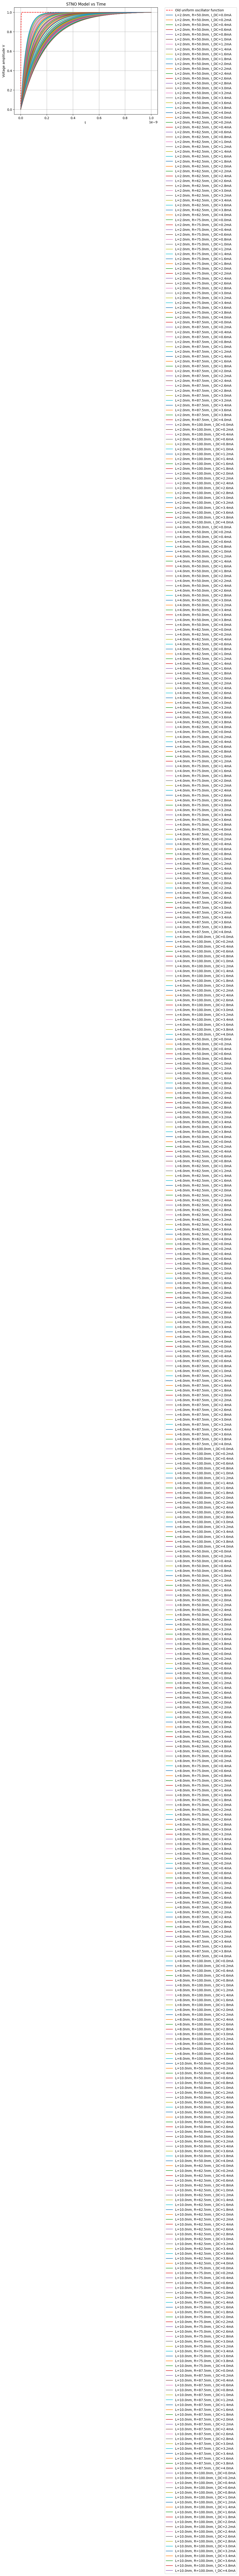

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0
import matplotlib.pyplot as plt
from scipy.constants import e

# uniform oscillator continous model old 

# Definiciones y constantes

I_DC = 0.003
c = 0.02
gyro_ratio = -1.76e11 # Gyromagnetic ratio (1/Ts)
gyro_ratio_hz = -2.8e10 # Gyroratio (Hz/T)
alpha_g = 0.01 # Gilbert Damping Constant
aplied_field_old = 0.44 # Applied Field (Tesla)
saturation_magnetization_old = 2.15 # Saturation Magnetization (Tesla)
epsilon = 0.5 # Spin Polarization Efficiency
lande_factor = 2.002 # Electron Lande Factor 
bhor_magneton_old = 9.27e-27 # Bohr magneton (J/T)

# Función para calcular I_th y T_relax
def Compute_I_th_and_Relax_time_old(L, R, I_DC):
    omega_0 = gyro_ratio * (aplied_field_old - (4 * np.pi * saturation_magnetization_old))
    gama_g = alpha_g * omega_0
    sigma = (epsilon * lande_factor * bhor_magneton_old) / (2 * e * saturation_magnetization_old * L * (np.pi * (R ** 2)))
    I_th = gama_g / sigma
    T_relax = 1 / (2 * gama_g * ((I_DC / I_th) - 1))
    Q = (8*np.pi*saturation_magnetization_old)/(aplied_field_old-4*np.pi*saturation_magnetization_old)
    return T_relax, I_th , Q 

# Definición de la dinamica del oscilador
def uniform_oscillator_function_old(c,time,T_relax, v_initial,Q,I_c,I_DC):
    
    if I_DC<I_c or ((I_DC )/(I_c) - 1 )/((I_DC )/(I_c) + Q ) < 0 :
        argument = 0

    else: 
        argument = ((I_DC )/(I_c) - 1 )/((I_DC )/(I_c) + Q )
    
    v_infinity = c * np.sqrt(argument)
    v_osc =  v_infinity * (1 - np.exp(-time/T_relax)) + v_initial * np.exp(-time/T_relax)
    return v_osc

aplied_field_new = 0.400
saturation_magnetization_new = 0.73
saturation_magnetization_new_A_M = saturation_magnetization_new/mu_0
bhor_magneton_new = 9.27e-24


# Función para calcular I_th y T_relax
def Compute_I_th_and_Relax_time_new(L, R, I_DC):
    omega_0 = gyro_ratio * (aplied_field_new -  saturation_magnetization_new)
    gama_g = alpha_g * omega_0
    sigma = (epsilon * lande_factor * bhor_magneton_new) / (2 * e * saturation_magnetization_new_A_M * L * (np.pi * (R ** 2)))
    I_th = gama_g / sigma
    T_relax = 1 / (2 * gama_g * ((I_DC / I_th) - 1))
    omega_M = gyro_ratio*saturation_magnetization_new
    Q = (2*omega_M)/omega_0-1
    return T_relax, I_th , Q 

# Definición de la dinamica del oscilador
def uniform_oscillator_function_new(c,time,T_relax, v_initial,Q,I_c,I_DC):
    
    if I_DC<I_c or ((I_DC )/(I_c) - 1 )/((I_DC )/(I_c) + Q ) < 0 :
        argument = 0

    else: 
        argument = ((I_DC )/(I_c) - 1 )/((I_DC )/(I_c) + Q )
    
    v_infinity = c * np.sqrt(argument)
    v_osc =  v_infinity * (1 - np.exp(-time/T_relax)) + v_initial * np.exp(-time/T_relax)
    return v_osc



def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Define parameters again and rerun
L_values = np.linspace(2e-9, 10e-9, 5)  # L values from 3 to 25 nm
R_values = np.linspace(50e-9, 100e-9, 5)  # R values from 100 to 250 nm
I_DC_Uniform_values = np.linspace(0e-3, 4e-3, 21)  # I_DC_Vortex values from 1 to 40 mA

# Parameters
time = np.linspace(0, 1e-9, 500)  # Time array from 0 to 10 with 500 points
v_initial = 0  # Initial voltage

T_relax_old, I_th_old , Q_old =  Compute_I_th_and_Relax_time_old(L=10e-9, R=60e-9, I_DC=0.004)
# Compute oscillator dynamics over time
uniform_oscillator_old = uniform_oscillator_function_old(c,time,T_relax=T_relax_old, v_initial=v_initial,Q=Q_old,I_c=I_th_old,I_DC=0.004)
uniform_oscillator_old_normalized = normalize(uniform_oscillator_old)


# Plotting
plt.figure(figsize=(8, 6))

plt.plot(time, uniform_oscillator_old_normalized, label='Old uniform oscillator function',color="red",linestyle="dashed")

for L in L_values:
    for R in R_values:
       for I_DC_Uniform in I_DC_Uniform_values:            
            T_relax, I_th, Q = Compute_I_th_and_Relax_time_new(L=L, R=R,I_DC=I_DC_Uniform)      
            v_uniform = uniform_oscillator_function_new(T_relax=T_relax,c=c, v_initial=v_initial, Q=Q, I_c=I_th, time=time, I_DC=I_DC_Uniform)
            v_uniform_normalized = normalize(v_uniform)
            label = f'L={L*1e9:.1f}nm, R={R*1e9:.1f}nm, I_DC={I_DC_Uniform*1e3:.1f}mA'
            plt.plot(time, v_uniform_normalized , label=label)


# Customize the plot appearance
plt.title('STNO Model vs Time')
plt.xlabel('t ')
plt.ylabel('Voltage amplitude V')
plt.grid(True)

# Create scrollable legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)

plt.tight_layout()  # Adjust layout to fit the plot and legend
plt.show()

C:\Users\paula\AppData\Local\Temp\ipykernel_58632\2720159258.py:78: RuntimeWarning: invalid value encountered in divide
  return (data - np.min(data)) / (np.max(data) - np.min(data))
C:\Users\paula\AppData\Local\Temp\ipykernel_58632\2720159258.py:119: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()  # Adjust layout to fit the plot and legend


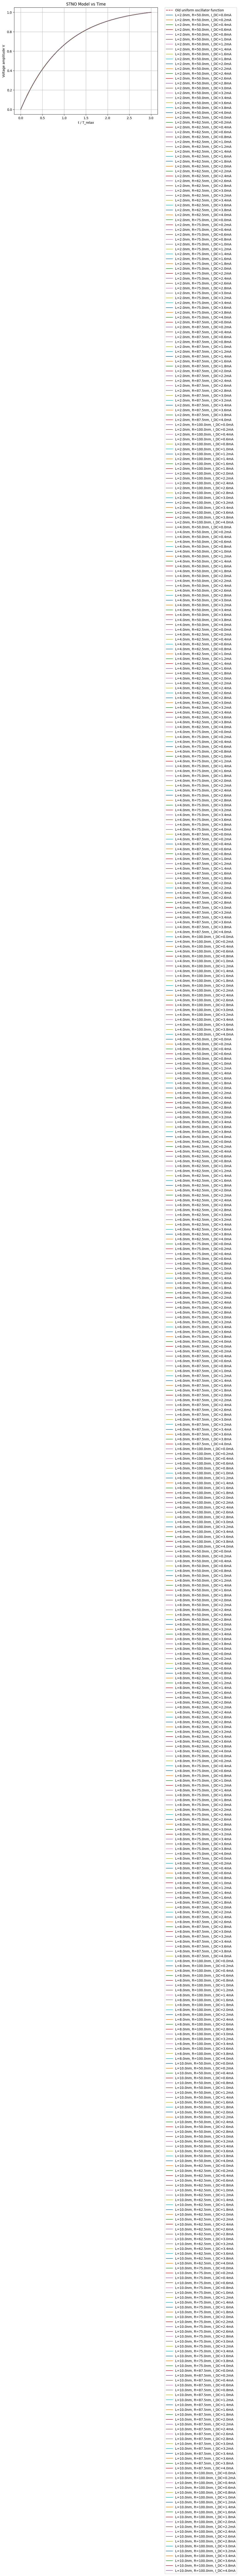

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import mu_0
import matplotlib.pyplot as plt
from scipy.constants import e

# uniform oscillator continous model old 

# Definiciones y constantes

I_DC = 0.003
c = 0.02
gyro_ratio = -1.76e11 # Gyromagnetic ratio (1/Ts)
gyro_ratio_hz = -2.8e10 # Gyroratio (Hz/T)
alpha_g = 0.01 # Gilbert Damping Constant
aplied_field_old = 0.44 # Applied Field (Tesla)
saturation_magnetization_old = 2.15 # Saturation Magnetization (Tesla)
epsilon = 0.5 # Spin Polarization Efficiency
lande_factor = 2.002 # Electron Lande Factor 
bhor_magneton_old = 9.27e-27 # Bohr magneton (J/T)

# Función para calcular I_th y T_relax
def Compute_I_th_and_Relax_time_old(L, R, I_DC):
    omega_0 = gyro_ratio * (aplied_field_old - (4 * np.pi * saturation_magnetization_old))
    gama_g = alpha_g * omega_0
    sigma = (epsilon * lande_factor * bhor_magneton_old) / (2 * e * saturation_magnetization_old * L * (np.pi * (R ** 2)))
    I_th = gama_g / sigma
    T_relax = 1 / (2 * gama_g * ((I_DC / I_th) - 1))
    Q = (8*np.pi*saturation_magnetization_old)/(aplied_field_old-4*np.pi*saturation_magnetization_old)
    return T_relax, I_th , Q 

# Definición de la dinamica del oscilador
def uniform_oscillator_function_old(c,time,T_relax, v_initial,Q,I_c,I_DC):
    
    if I_DC<I_c or ((I_DC )/(I_c) - 1 )/((I_DC )/(I_c) + Q ) < 0 :
        argument = 0

    else: 
        argument = ((I_DC )/(I_c) - 1 )/((I_DC )/(I_c) + Q )
    
    v_infinity = c * np.sqrt(argument)
    v_osc =  v_infinity * (1 - np.exp(-time)) + v_initial * np.exp(-time)
    return v_osc

aplied_field_new = 0.400
saturation_magnetization_new = 0.73
saturation_magnetization_new_A_M = saturation_magnetization_new/mu_0
bhor_magneton_new = 9.27e-24


# Función para calcular I_th y T_relax
def Compute_I_th_and_Relax_time_new(L, R, I_DC):
    omega_0 = gyro_ratio * (aplied_field_new -  saturation_magnetization_new)
    gama_g = alpha_g * omega_0
    sigma = (epsilon * lande_factor * bhor_magneton_new) / (2 * e * saturation_magnetization_new_A_M * L * (np.pi * (R ** 2)))
    I_th = gama_g / sigma
    T_relax = 1 / (2 * gama_g * ((I_DC / I_th) - 1))
    omega_M = gyro_ratio*saturation_magnetization_new
    Q = (2*omega_M)/omega_0-1
    return T_relax, I_th , Q 

# Definición de la dinamica del oscilador
def uniform_oscillator_function_new(c,time,T_relax, v_initial,Q,I_c,I_DC):
    
    if I_DC<I_c or ((I_DC )/(I_c) - 1 )/((I_DC )/(I_c) + Q ) < 0 :
        argument = 0

    else: 
        argument = ((I_DC )/(I_c) - 1 )/((I_DC )/(I_c) + Q )
    
    v_infinity = c * np.sqrt(argument)
    v_osc =  v_infinity * (1 - np.exp(-time)) + v_initial * np.exp(-time)
    return v_osc



def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

# Define parameters again and rerun
L_values = np.linspace(2e-9, 10e-9, 5)  # L values from 3 to 25 nm
R_values = np.linspace(50e-9, 100e-9, 5)  # R values from 100 to 250 nm
I_DC_Uniform_values = np.linspace(0e-3, 4e-3, 21)  # I_DC_Vortex values from 1 to 40 mA

# Parameters
time = np.linspace(0, 3, 500)  # Time array from 0 to 10 with 500 points
v_initial = 0  # Initial voltage

T_relax_old, I_th_old , Q_old =  Compute_I_th_and_Relax_time_old(L=10e-9, R=60e-9, I_DC=0.004)
# Compute oscillator dynamics over time
uniform_oscillator_old = uniform_oscillator_function_old(c,time,T_relax=T_relax_old, v_initial=v_initial,Q=Q_old,I_c=I_th_old,I_DC=0.004)
uniform_oscillator_old_normalized = normalize(uniform_oscillator_old)


# Plotting
plt.figure(figsize=(8, 6))

plt.plot(time, uniform_oscillator_old_normalized, label='Old uniform oscillator function',color="red",linestyle="dashed")

for L in L_values:
    for R in R_values:
       for I_DC_Uniform in I_DC_Uniform_values:            
            T_relax, I_th, Q = Compute_I_th_and_Relax_time_new(L=L, R=R,I_DC=I_DC_Uniform)      
            v_uniform = uniform_oscillator_function_new(T_relax=T_relax,c=c, v_initial=v_initial, Q=Q, I_c=I_th, time=time, I_DC=I_DC_Uniform)
            v_uniform_normalized = normalize(v_uniform)
            label = f'L={L*1e9:.1f}nm, R={R*1e9:.1f}nm, I_DC={I_DC_Uniform*1e3:.1f}mA'
            plt.plot(time, v_uniform_normalized , label=label)


# Customize the plot appearance
plt.title('STNO Model vs Time')
plt.xlabel('t / T_relax')
plt.ylabel('Voltage amplitude V')
plt.grid(True)

# Create scrollable legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)

plt.tight_layout()  # Adjust layout to fit the plot and legend
plt.show()  # Adjust layout to fit the plot and legend
plt.show()

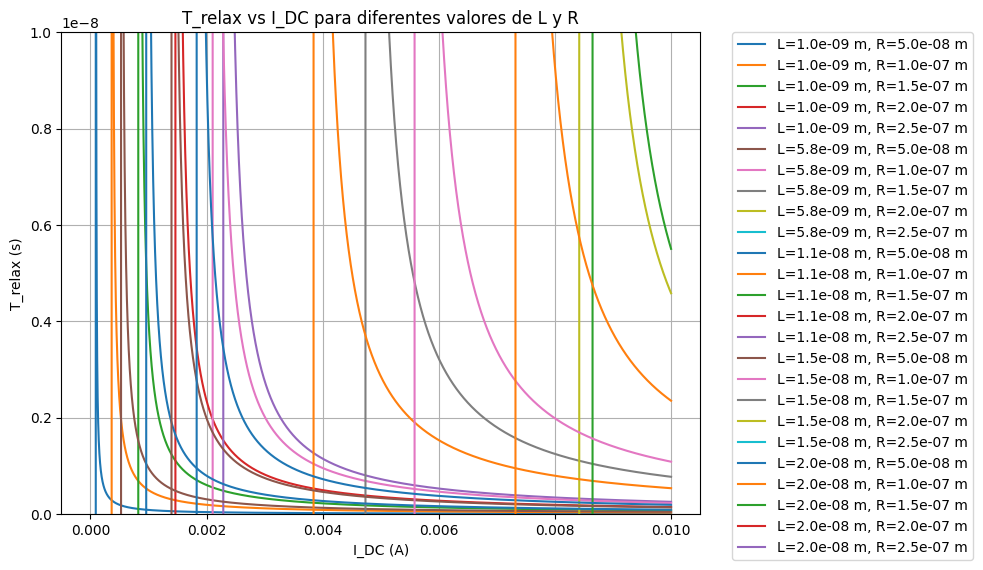

: 

In [11]:
# Definir diferentes valores para L y R
L_values = np.linspace(1e-9, 20e-9, 5)  # Tres valores para la longitud del sistema (m)
R_values = np.linspace(50e-9, 250e-9, 5)  # Tres valores para el radio del sistema (m)


# Definir un rango de valores para I_DC
I_DC_values = np.linspace(0e-3, 10e-3, 10000)  # Corriente directa desde 1e-3 A a 10e-3 A

# Crear la figura para los gráficos
plt.figure(figsize=(10, 6))

# Realizar los cálculos para diferentes combinaciones de L y R
for L in L_values:
    for R in R_values:
        T_relax_values = []
        for I_DC in I_DC_values:
            T_relax, I_th, Q = Compute_I_th_and_Relax_time_new(L, R, I_DC)
            T_relax_values.append(T_relax)
        
        # Graficar los resultados para cada combinación de L y R
        plt.plot(I_DC_values, T_relax_values, label=f'L={L:.1e} m, R={R:.1e} m')

# Configuración del gráfico
plt.title('T_relax vs I_DC para diferentes valores de L y R')
plt.xlabel('I_DC (A)')
plt.ylabel('T_relax (s)')
plt.ylim(0,1e-8)
plt.legend()
plt.grid(True)
# Create scrollable legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., ncol=1)

plt.tight_layout()  # Adjust layout to fit the plot and legend

plt.show()
